### A propos du dataset 


La dataset porte sur la consommation de carburant, **`FuelConsumption.csv`**, qui contient les cotes de consommation de carburant spécifiques à chaque modèle et les émissions de dioxyde de carbone estimées pour les nouveaux véhicules légers vendus au détail au Canada.
- **MODELYEAR** par exemple 2014
- **Faire** par exemple Acura
- **MODEL** par exemple ILX
- **CLASSE VÉHICULE** par exemple SUV
- **Taille du moteur** par exemple 4,7
- **CYLINDRES** par ex. 6
- **TRANSMISSION** par exemple A6
- CONSOMMATION DE CARBURANT dans la VILLE (L/100 km)** par exemple 9,9
- CONSOMMATION DE CARBURANT sur l'autoroute (L/100 km)** par exemple 8,9
- CONSOMMATION DE CARBURANT en COMBUSTIBLE (L/100 km)** ex. 9,2
- ÉMISSIONS DE CO2 (g/km)** ex. 182 --> faible --> 0




### Importation des bibliothèques 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline 

### Collecte de données : data collecting 

In [56]:
my_data=pd.read_csv("FuelConsumptionCo2.csv")
my_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Exploration des données : Data exploration 

In [5]:
my_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [11]:
my_data.shape

(1067, 13)

In [12]:
#On va extraire un ensemble de features 
features=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']
my_data_t=my_data[features]
my_data_t

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000191315E4208>,
      dtype=object)

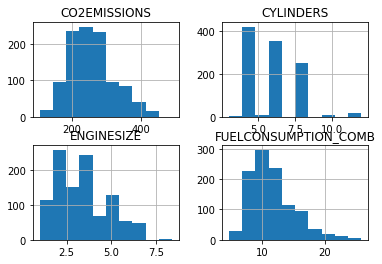

In [14]:
my_data_t.hist()

In [17]:
my_data_t['CYLINDERS'].unique()

array([ 4,  6, 12,  8, 10,  3,  5], dtype=int64)

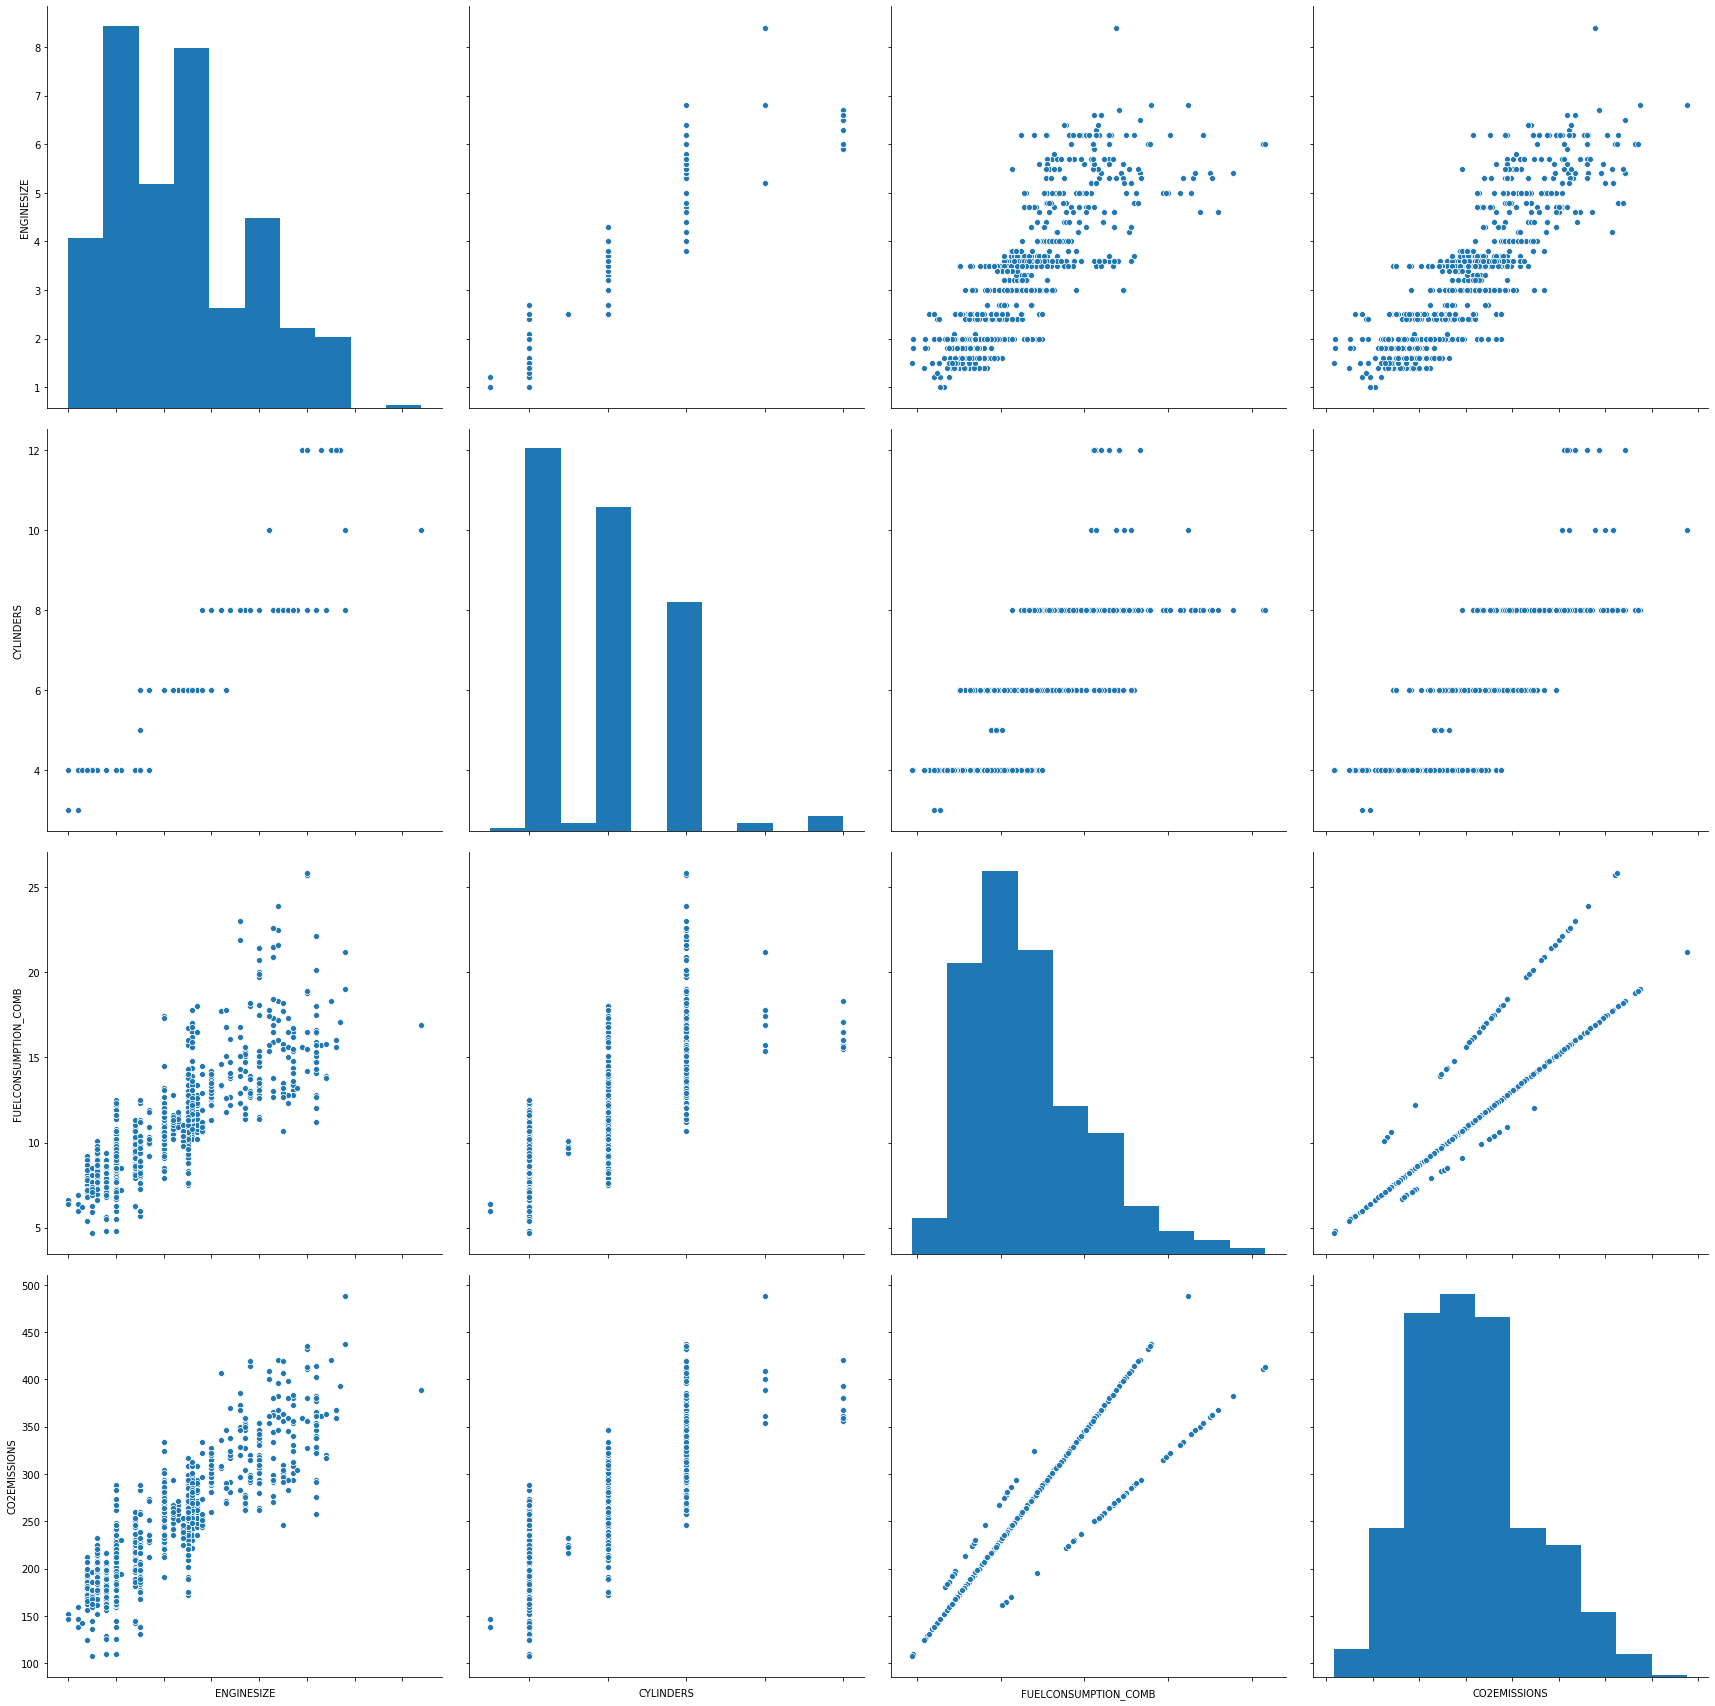

In [60]:
import seaborn as sns 
g = sns.pairplot(my_data_t,  palette='tab20',size=6)
g.set(xticklabels=[]);

Maintenant, nous allons tracer chacune de ces features par rapport à l'émission, pour voir dans quelle mesure leur relation est linéaire 

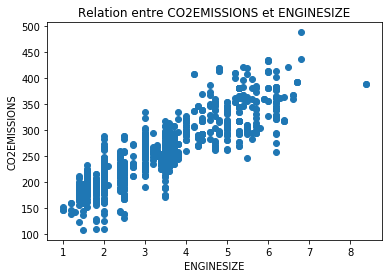

In [19]:
plt.scatter(my_data_t.ENGINESIZE,my_data_t.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Relation entre CO2EMISSIONS et ENGINESIZE")
plt.show()

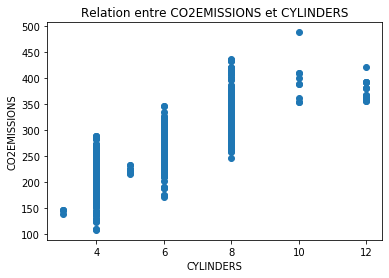

In [21]:
plt.scatter(my_data_t.CYLINDERS,my_data_t.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.title("Relation entre CO2EMISSIONS et CYLINDERS")
plt.show()

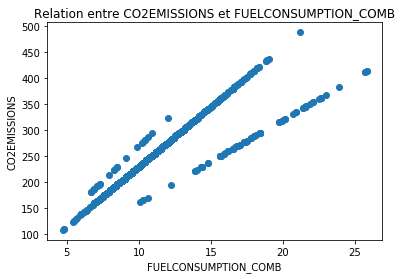

In [22]:
plt.scatter(my_data_t.FUELCONSUMPTION_COMB,my_data_t.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.title("Relation entre CO2EMISSIONS et FUELCONSUMPTION_COMB")
plt.show()

In [23]:
#On remarque qu'il existe un relation linéaire entre ENGINESIZE et CO2EMISSIONS alors que les autres relations non linéaires 


### Train & Test 

La régression linéaire s'adapte à un modèle linéaire avec des coefficients B = (B1, ..., Bn) pour minimiser la "somme résiduelle des carrés" entre les x indépendants dans l'ensemble de données, et y dépendant par l'approximation linéaire. 

In [26]:
msk = np.random.rand(len(my_data)) < 0.8
train = my_data_t[msk]
test = my_data_t[~msk]
#80 % du dataset pour le training et 20 % du dataset pour le test 

In [27]:
#Puisque on a une relation lineaire ente engine size et emission donc on a une régression linéaire simple

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])    #créer un vecteur remplie par les données du colonne engine size 
train_y = np.asanyarray(train[['CO2EMISSIONS']])  #créer un vecteur remplie par les données du colonne emission du CO2
regr.fit (train_x, train_y)                       # Train du model 
# The coefficients
print ('Coefficients: ', regr.coef_)              # le meilleure coefficient du droit pour notre model (pente du droite)
print ('Intercept: ',regr.intercept_)             # la meilleure point d'intersection avec l'axe des emissions.

Coefficients:  [[38.60838286]]
Intercept:  [126.70823512]


Comme mentionné précédemment, __Coefficient__ et __Intercept__ dans la régression linéaire simple, sont les paramètres de la ligne d'ajustement. 
Étant donné qu'il s'agit d'une régression linéaire simple, avec seulement 2 paramètres, et sachant que les paramètres sont l'intercept et la pente de la ligne, sklearn peut les estimer directement à partir de nos données. 
Notez que toutes les données doivent être disponibles pour traverser et calculer les paramètres.



### Traçage des sorties : 

In [32]:
train.ENGINESIZE

1       2.4
2       1.5
3       3.5
4       3.5
5       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 874, dtype: float64

Text(0, 0.5, 'Emission')

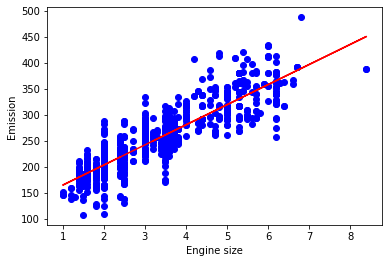

In [34]:
plt.scatter(train_x, train_y,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

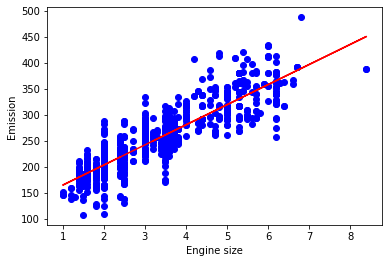

In [35]:
#Ou bien 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Évaluation

Nous comparons les valeurs réelles et les valeurs prédites pour calculer la précision d'un modèle de régression. Les mesures d'évaluation jouent un rôle clé dans le développement d'un modèle, car elles permettent de déterminer les domaines qui doivent être améliorés.

Il existe différentes mesures d'évaluation du modèle, utilisons ici le MSE pour calculer la précision de notre modèle en fonction de l'ensemble des tests : 
    - Erreur moyenne absolue : C'est la moyenne de la valeur absolue des erreurs. C'est la mesure la plus facile à comprendre puisqu'il s'agit d'une erreur moyenne.
    - Erreur quadratique moyenne (EQM) : L'erreur quadratique moyenne (EQM) est la moyenne de l'erreur quadratique. Elle est plus populaire que l'erreur moyenne absolue car elle est davantage axée sur les erreurs importantes. Cela est dû au fait que le terme carré augmente exponentiellement les grandes erreurs par rapport aux petites.
    - Erreur quadratique moyenne (RMSE).
    - R au carré n'est pas une erreur, mais c'est une mesure populaire de la précision de votre modèle. Il représente la proximité des données par rapport à la ligne de régression ajustée. Plus le R au carré est élevé, plus le modèle est adapté à vos données. Le meilleur score possible est de 1,0 et il peut être négatif (car le modèle peut être arbitrairement pire).




In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 25.14
Residual sum of squares (MSE): 1082.62
R2-score: 0.60


In [37]:
#Autrement 

In [38]:
from sklearn.model_selection import train_test_split


In [49]:
features2=['ENGINESIZE']
X=my_data_t[features2]
y=my_data_t.drop(features2,axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [50]:
regr_model = linear_model.LinearRegression()
regr_model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
predictions=regr_model.predict(X_test)

In [52]:
print("R2-score: %.2f" % r2_score(y_test , predictions) )

R2-score: 0.75
